### udecity review course

### data issues 

1. missing values 
2. duplicate data
2. incorrect data types (pd.datetime('date'))

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [22]:
df = pd.read_csv('../datasets/cancer_data_means_for_cleaning.csv')

In [23]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


### the first thing we need to do is to check if data is clean or not

> if we have missing values we should find the best way to fill the missing values or drop it here we fill it with the mean value  
we have another issue is duplicate data this happend because of merge values from differant resources or human error 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            548 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         521 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave_points_mean     569 non-null    float64
 10  symmetry_mean           504 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB


In [27]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean              21
perimeter_mean             0
area_mean                  0
smoothness_mean           48
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean             65
fractal_dimension_mean     0
dtype: int64

In [29]:
smoothness_mean = df['smoothness_mean'].mean()
texture_mean = df["texture_mean"].mean()
symmetry_mean = df['symmetry_mean'].meann()

In [30]:
df['smoothness_mean'].fillna(smoothness_mean, inplace= True)
df['texture_mean'].fillna(texture_mean, inplace= True)
df['symmetry_mean'].fillna(symmetry_mean, inplace= True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave_points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB


In [32]:
df.isna().sum()

id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave_points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [13]:
sum(df.duplicated())

0

In [14]:
df.drop_duplicates(inplace= True)

> the more complex example of duplication if we have patient data and there is data have the same id 
here what should we do  
> 1. merge id  
> 2. take the leatest

### Change the column name

In [33]:
# remove "_mean" from column names
new_labels = []
for col in df.columns:
    if '_mean' in col:
        new_labels.append(col[:-5])  # exclude last 6 characters
    else:
        new_labels.append(col)

# new labels for our columns
new_labels

['id',
 'diagnosis',
 'radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'concavity',
 'concave_points',
 'symmetry',
 'fractal_dimension']

In [35]:
df.columns = new_labels
df.head(2)

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,842302,M,17.99,19.293431,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.770000,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667


### use digrams to find relations

> histogram find the distribution & scatter pot to find the relation between entities 

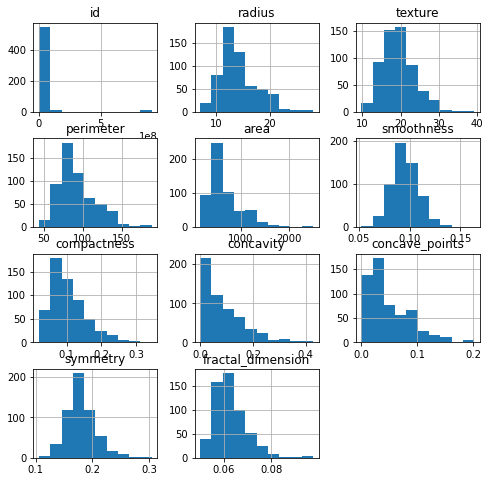

In [42]:
# here we cna use hist 
df.hist(figsize= (8, 8));

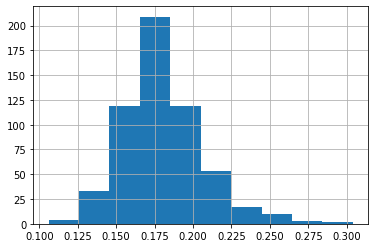

In [43]:
# or you can use it for only one values as 
df['symmetry'].hist();

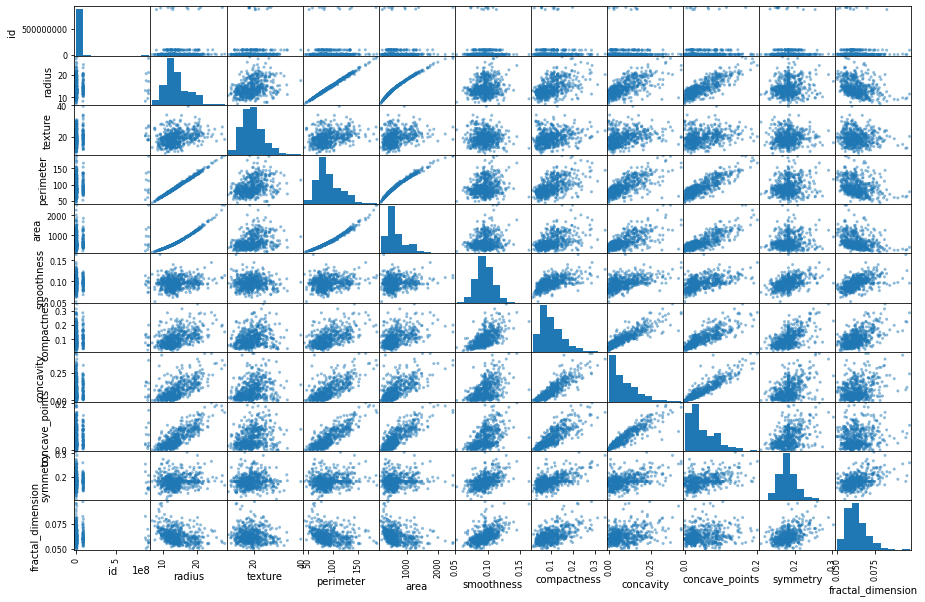

In [49]:
pd.plotting.scatter_matrix(df, figsize= (15, 10));

In [50]:
df.columns

Index(['id', 'diagnosis', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry',
       'fractal_dimension'],
      dtype='object')

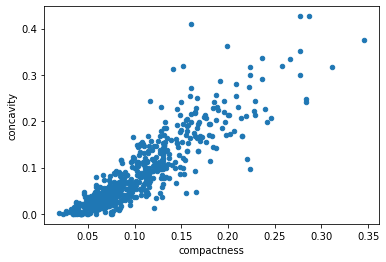

In [55]:
df.plot(x= "compactness", y= "concavity", kind= "scatter");

<AxesSubplot:>

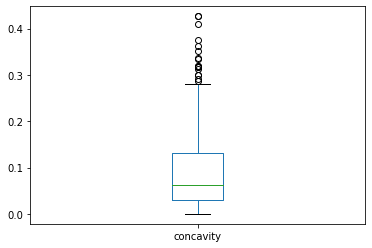

In [57]:
df["concavity"].plot(kind = "box")

> 1. What is the relationship between temperature and electrical output?
> 2. Does the humidity variable appear to be normally distributed?
> 3. Which variable appears to have the most outliers?

In [76]:
df = pd.read_csv('../datasets/powerplant_data_numerical_data.csv')
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


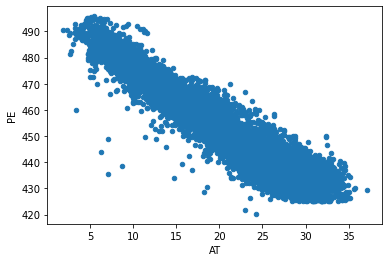

In [77]:
# plot relationship between temperature and electrical output : it is negative collerations
df.plot(x='AT',y='PE',kind='scatter');

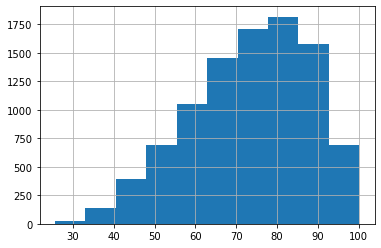

In [78]:
# plot distribution of humidity
# Does the humidity variable appear to be normally distributed? => no
df['RH'].hist();

In [65]:
# plot box plots for each variable
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

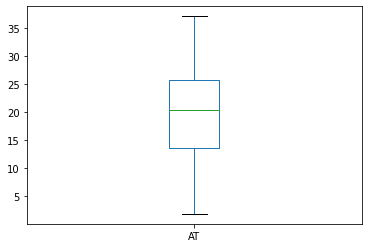

In [66]:
df['AT'].plot(kind='box');

<AxesSubplot:>

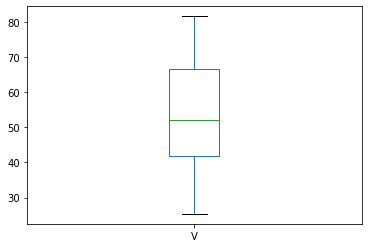

In [67]:
df['V'].plot(kind='box')

### for categorical data

In [134]:
df = pd.read_excel("../datasets/SmartWay_ 2018.xlsx")

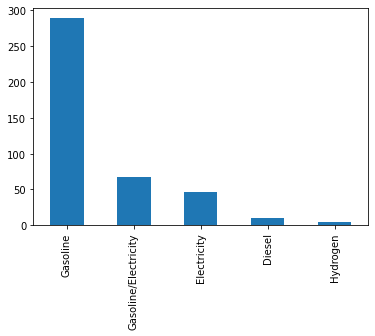

In [135]:
df['Fuel'].value_counts().plot(kind ="bar");

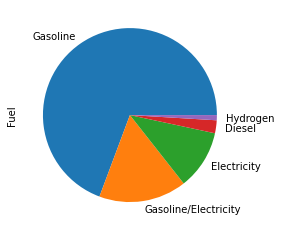

In [136]:
df['Fuel'].value_counts().plot(kind ="pie");

### descriptive statistic and visualization

In [80]:
df = pd.read_csv('../datasets/cancer_data_means_for_cleaning.csv')
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,NaN,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667


In [83]:
df['diagnosis'].value_counts()

B    358
M    211
Name: diagnosis, dtype: int64

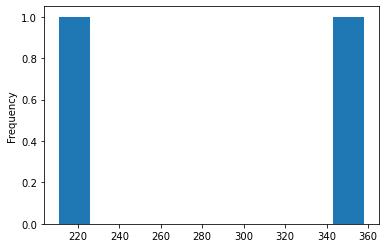

In [86]:
df['diagnosis'].value_counts().plot(kind = 'hist');

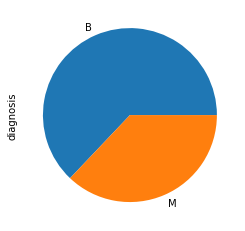

In [87]:
df['diagnosis'].value_counts().plot(kind = 'pie');

> get malignant tumor we will get the data using this mask df['diagnosis'] == "M"

In [81]:
df_m = df[df['diagnosis'] == "M"]

> get benign tumor we will get the data using this mask df['diagnosis'] == "B"

In [88]:
df_b = df[df['diagnosis'] == "B"]

In [89]:
import matplotlib.pyplot as plt

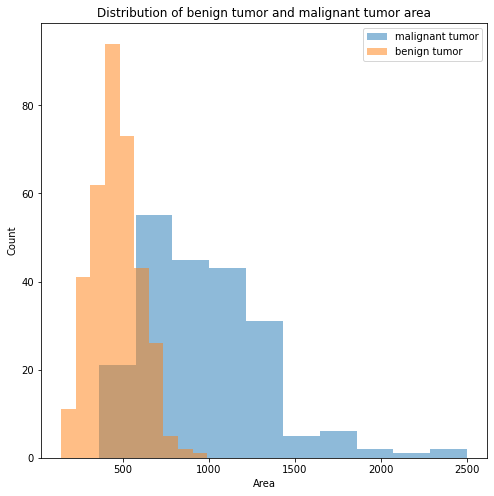

In [106]:
fig, ax = plt.subplots(figsize= (8, 8)) 
ax.hist(df_m['area_mean'], alpha = .5, label = "malignant tumor")
ax.hist(df_b['area_mean'], alpha = .5, label = "benign tumor")
ax.set_title("Distribution of benign tumor and malignant tumor area");
ax.set_xlabel("Area")
ax.set_ylabel("Count")
ax.legend(loc= "upper right");
plt.show()

In [108]:
df = pd.read_csv('../datasets/store_data_numerical_date.csv')
df.head()

,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023


In [112]:
df.shape

(200, 6)

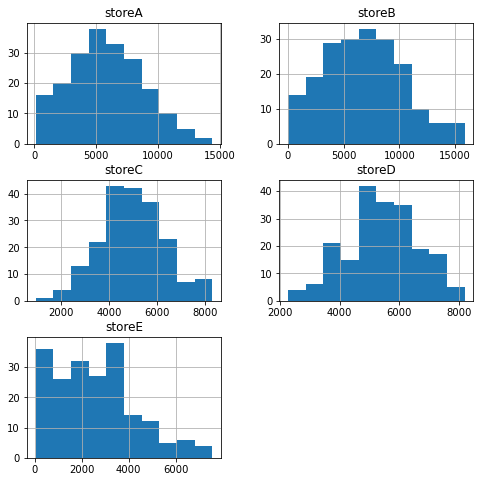

In [109]:
# explore data
df.hist(figsize=(8,8));

In [110]:
df['week'] = pd.to_datetime(df['week'])

In [114]:
df.iloc[196:, 1:]

,storeA,storeB,storeC,storeD,storeE
196,4853,6503,4187,5956,1458
197,9202,3677,4540,6186,243
198,3512,7511,4151,5596,3501
199,7560,6904,3569,5045,2585


In [111]:
df.iloc[196:, 1:].sum()

storeA    25127
storeB    24595
storeC    16447
storeD    22783
storeE     7787
dtype: int64

In [113]:
df.iloc[:, 1:].mean()

storeA    5865.480
storeB    6756.710
storeC    4942.105
storeD    5431.405
storeE    2580.025
dtype: float64

> 1. Which store has the highest total sales for the final month of data?
> 2. Which store makes the most sales on average?
> 3. Which store sells the most during the week of March 13th, 2016?
> 4. In what week does store C make its worst sales?
> 5. Which store has the most sales in the latest 3-month period?

In [6]:
import datetime
# total sales for the last month
new_df = df.loc[df['week'] == datetime.datetime(2016,3,13)]
new_df.iloc[:,1:].sum()

KeyError: 'week'

### Communication using data visualisation
> descriptive statistic

In [4]:
df = pd.read_csv('../datasets/census_income_data.csv')

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [139]:
df_a = df[df['income'] == " >50K"]

In [140]:
df_b = df[df['income'] == " <=50K"]

In [141]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

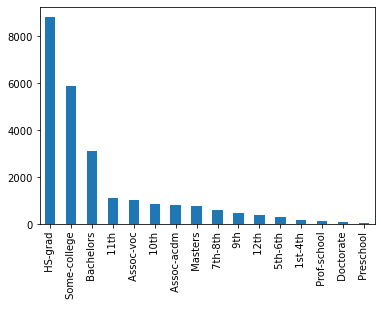

In [148]:
ind = df_b['education'].value_counts().index
df_b['education'].value_counts()[ind].plot(kind = 'bar');


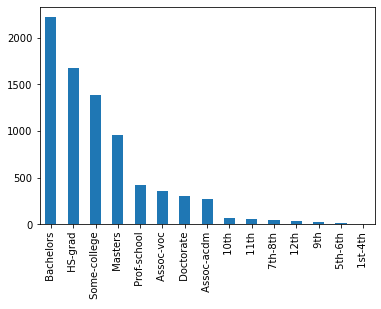

In [150]:
ind = df_a['education'].value_counts().index
df_a['education'].value_counts()[ind].plot(kind = 'bar');

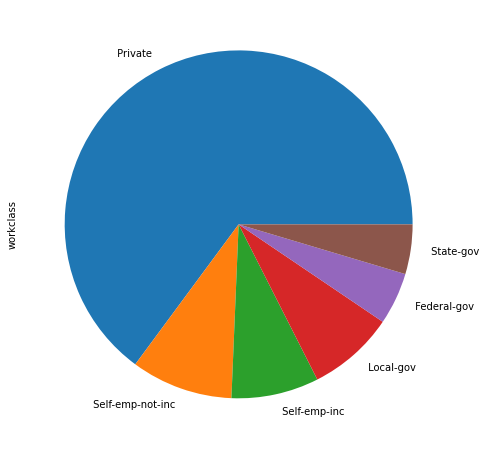

In [154]:
df_a['workclass'].value_counts().plot(kind = 'pie', figsize = (8, 8));

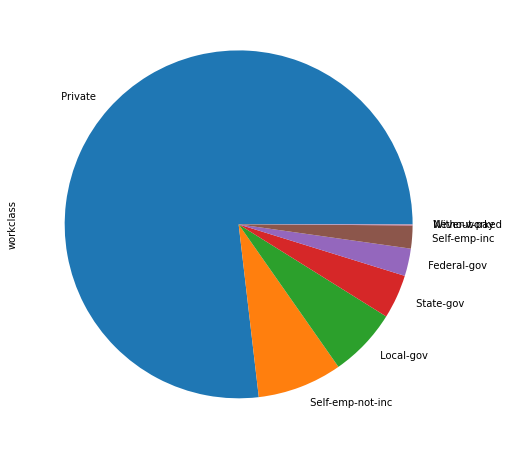

In [156]:
df_b['workclass'].value_counts().plot(kind = 'pie', figsize = (8, 8));

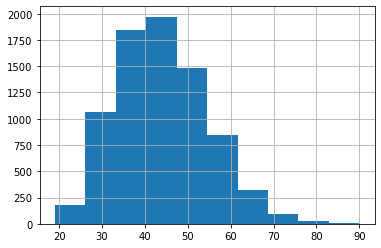

In [158]:
df_a['age'].hist();

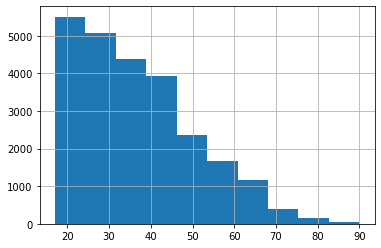

In [159]:
df_b['age'].hist();

In [160]:
df_a['age'].describe()

count    7841.000000
mean       44.249841
std        10.519028
min        19.000000
25%        36.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64

In [161]:
df_b['age'].describe()

count    24720.000000
mean        36.783738
std         14.020088
min         17.000000
25%         25.000000
50%         34.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

### Communication using data visualisation
> numerical statistic

1. Which store has the highest total sales for the last month?
2. Which store makes the most sales on average?
3. Which store sells the most during the week of March 13th, 2016?
4. Which store has the most sales in the latest 3-month period?

In [9]:
df = pd.read_csv('../datasets/store_data_numerical_date.csv')
df.head()
df.shape

(200, 6)

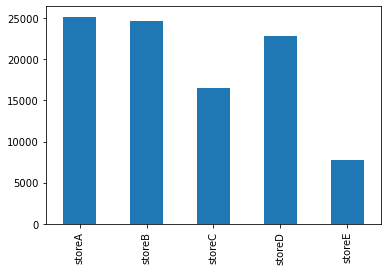

In [163]:
# sales for the last month
df.iloc[196:, 1:].sum().plot(kind='bar');

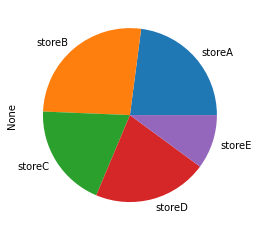

In [164]:
# average sales
df.mean().plot(kind='pie');

# Statistic

> what is measure of center and spread?  
measure of center is the (mean, median, Mode) which help us to see the most comman data shape and teach us how to handel outilers  
measure of spread is ()

### data 
> is distinct pieces of information which has many many ways and the future now is for data it help us to detect diseases and many other things  
data help you to communicate with people around the world no matter what field you in from (insurance, banking and accounting, medicine ....)

### data types

*quantitive data*
> numerical values that help us to perform mathmatical operation   
like (Age, Income, Height, Travel Distance to Work, Ratings on a Survey (Poor, Ok, Great), Temperature, Average Speed)

###### Continuous vs. Discrete
We can think of quantitative data as being either continuous or discrete.

**Continuous data** can be split into smaller and smaller units, and still a smaller unit exists. An example of this is the age of the dog - we can measure the units of the age in years, months, days, hours, seconds, but there are still smaller units that could be associated with the age.

**Discrete data** only takes on countable values. The number of dogs we interact with is an example of a discrete data type.

*categorical data*
> type classifications or groups category  
like (Marital Status (Single, Married, Divorced, etc.), Letter Grades (A+, A, A-, B+, B, B-, ...), )

##### Categorical Ordinal vs. Categorical Nominal
**Categorical Ordinal** data take on a ranked ordering (like a ranked interaction on a scale from Very Poor to Very Good with the dogs).

**Categorical Nominal** data do not have an order or ranking (like the breeds of the dog).

#### Recap

#### Quantitative and Categorical

Quantitative can be further divided into Continuous or Discrete.

Categorical data can be divided into **Ordinal or Nominal.**

>You should have now mastered what types of data in the world around us falls into each of these four buckets: Discrete, Continuous, Nominal, and Ordinal. In the next sections, we will work through the numeric summaries that relate specifically to quantitative variables.

**Quantitative vs. Categorical**
>Some of these can be a bit tricky - notice even though zip codes are a number, they aren’t really a quantitative variable. If we add two zip codes together, we do not obtain any useful information from this new value. Therefore, this is a categorical variable.

>Height, Age, the Number of Pages in a Book and Annual Income all take on values that we can add, subtract and perform other operations with to gain useful insight. Hence, these are quantitative.

>Gender, Letter Grade, Breakfast Type, Marital Status, and Zip Code can be thought of as labels for a group of items or individuals. Hence, these are categorical.

#### Continuous vs. Discrete
> To consider if we have continuous or discrete data, we should see if we can split our data into smaller and smaller units. Consider time - we could measure an event in years, months, days, hours, minutes, or seconds, and even at seconds we know there are smaller units we could measure time in. Therefore, we know this data type is continuous. Height, age, and income are all examples of continuous data. Alternatively, the number of pages in a book, dogs I count outside a coffee shop, or trees in a yard are discrete data. We would not want to split our dogs in half.

#### Ordinal vs. Nominal
> In looking at categorical variables, we found Gender, Marital Status, Zip Code and your Breakfast items are nominal variables where there is no order ranking associated with this type of data. Whether you ate cereal, toast, eggs, or only coffee for breakfast; there is no rank ordering associated with your breakfast.

> Alternatively, the Letter Grade or Survey Ratings have a rank ordering associated with it, as ordinal data. If you receive an A, this is higher than an A-. An A- is ranked higher than a B+, and so on... Ordinal variables frequently occur on rating scales from very poor to very good. In many cases we turn these ordinal variables into numbers, as we can more easily analyze them, but more on this later!



### Analyzing Quantitative Data
> Four Aspects for Quantitative Data
There are four main aspects to analyzing Quantitative data.

1. Measures of Center
2. Measures of Spread
3. .The Shape of the data.
4. Outliers

### Analyzing Categorical Data
> Though not discussed in the video, analyzing categorical data has fewer parts to consider. Categorical data is analyzed usually be looking at the counts or proportion of individuals that fall into each group. For example if we were looking at the breeds of the dogs, we would care about how many dogs are of each breed, or what proportion of dogs are of each breed type.

#### Measures of Center
> There are three measures of center:

1. Mean
2. Median
3. Mode

##### The Mean
> The mean is often called the average or the expected value in mathematics. We calculate the mean by adding all of our values together, and dividing by the number of values in our dataset.  
is always the best measure of the center


### The Median
> The median splits our data so that 50% of our values are lower and 50% are higher. We found in this video that how we calculate the median depends on if we have an even number of observations or an odd number of observations.

##### Median for Odd Values
> If we have an odd number of observations, the median is simply the number in the direct middle. For example, if we have 7 observations, the median is the fourth value when our numbers are ordered from smallest to largest. If we have 9 observations, the median is the fifth value.

#### Median for Even Values
> If we have an even number of observations, the median is the average of the two values in the middle. For example, if we have 8 observations, we average the fourth and fifth values together when our numbers are ordered from smallest to largest.

**In order to compute the median we MUST sort our values first.**

> Whether we use the mean or median to describe a dataset is largely dependent on the shape of our dataset and if there are any outliers. We will talk about this in just a bit!



### The Mode
> The mode is the most frequently observed value in our dataset.

> There might be multiple modes for a particular dataset, or no mode at all.

### No Mode
> If all observations in our dataset are observed with the same frequency, there is no mode. If we have the dataset:

1, 1, 2, 2, 3, 3, 4, 4

There is no mode, because all observations occur the same number of times.

### Many Modes
> If two (or more) numbers share the maximum value, then there is more than one mode. If we have the dataset:

> 1, 2, 3, 3, 3, 4, 5, 6, 6, 6, 7, 8, 9

> There are two modes 3 and 6, because these values share the maximum frequencies at 3 times, while all other values only appear once.


### Measures of Spread
> Measures of Spread are used to provide us an idea of how spread out our data are from one another. Common measures of spread include:

1. Range
2. Interquartile Range (IQR)
3. Standard Deviation
4. Variance

> Throughout this lesson you will learn how to calculate these, as well as why we would use one measure of spread over another.

# Histograms
> Histograms are super useful to understanding the different aspects of quantitative data. In the upcoming concepts, you will see histograms used all the time to help you understand the four aspects we outlined earlier regarding a quantitative variable:  
1. center  
2. spread  
3. shape  
4. outliers  

# Calculating the 5 Number Summary
> The five number summary consist of 5 values:
Minimum: The smallest number in the dataset.\
**Q1**
    : The value such that 25% of the data fall below.\
**Q2**
    : The value such that 50% of the data fall below.\
**Q3** 
    : The value such that 75% of the data fall below.\
Maximum: The largest value in the dataset.
In the above video we saw that calculating each of these values was essentially just finding the median of a bunch of different dataset. Because we are essentially calculating a bunch of medians, the calculation depends on whether we have an odd or even number of values.

### Range  
    The range is then calculated as the difference between the maximum and the minimum.

### IQR
    The interquartile range is calculated as the difference between Q3 and Q1 	 .



## Standard Deviation and Variance

> The standard deviation is one of the most common measures for talking about the spread of data. It is defined as the average distance of each observation from the mean.

> In the above video we saw this as how far individuals were from the average distance from work (the example distances shown are examples from the full data set, the mean of just those 4 numbers is 38.5. The mean of 18 shown later in the video is the mean of the full data set which is not shown in the video). In the next video, you will see exactly how this is calculated.



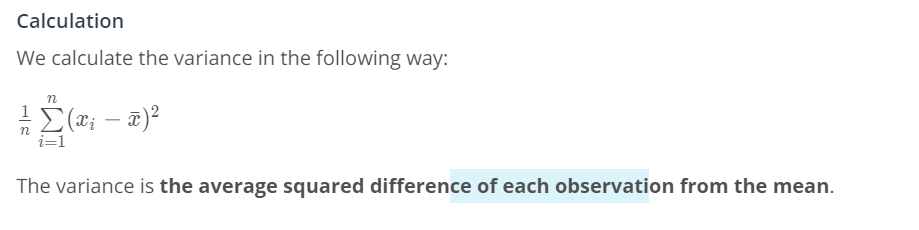

[Intuitive explanation for dividing by n−1 when calculating standard deviation](https://video.udacity-data.com/topher/2019/November/5dc4adcb_intuition-intuitive-explanation-for-dividing-by-n-1-when-calculating-standard-deviation-cross-validated/intuition-intuitive-explanation-for-dividing-by-n-1-when-calculating-standard-deviation-cross-validated.htm)  
[supported material](https://stats.stackexchange.com/questions/3931/intuitive-explanation-for-dividing-by-n-1-when-calculating-standard-deviation)  
[supported material](https://stats.stackexchange.com/questions/89179/real-life-examples-of-distributions-with-negative-skewness)  
[supported material](https://personal.utdallas.edu/~scniu/OPRE-6301/documents/Important_Probability_Distributions.pdf)  
[supported material](https://www.quora.com/What-are-some-real-world-examples-of-normally-distributed-quantities)  
[supported material](https://video.udacity-data.com/topher/2019/November/5dc5eeaa_quora/quora.htm)  
[supported material](https://video.udacity-data.com/topher/2019/November/5dc5ef33_cross-validated/cross-validated.pdf)  
[supported material](http://d-scholarship.pitt.edu/7948/1/Seo.pdf)  

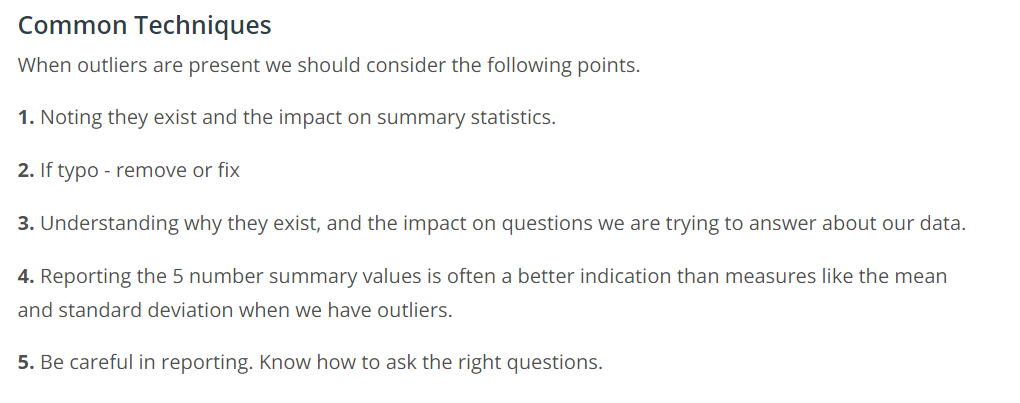

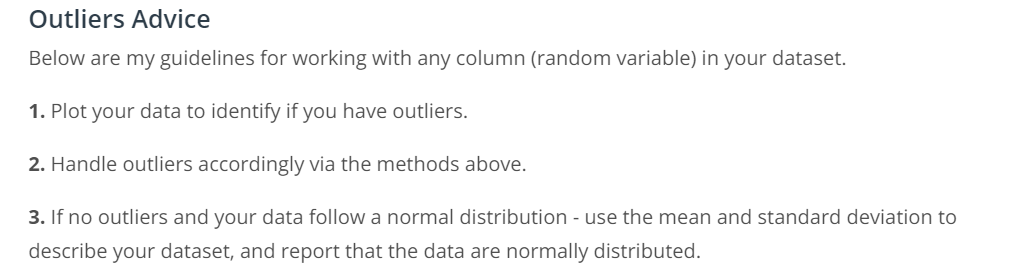

### Supporting Materials
 [Kolmogorov-Smirnov test](https://video.udacity-data.com/topher/2019/November/5dc5c71b_kolmogorovsmirnov-test-wikipedia/kolmogorovsmirnov-test-wikipedia.pdf)  
 [Normal quantile plots](https://video.udacity-data.com/topher/2019/November/5dc5e50d_q-q-plots-university-of-virginia-library-research-data-services-sciences/q-q-plots-university-of-virginia-library-research-data-services-sciences.pdf)

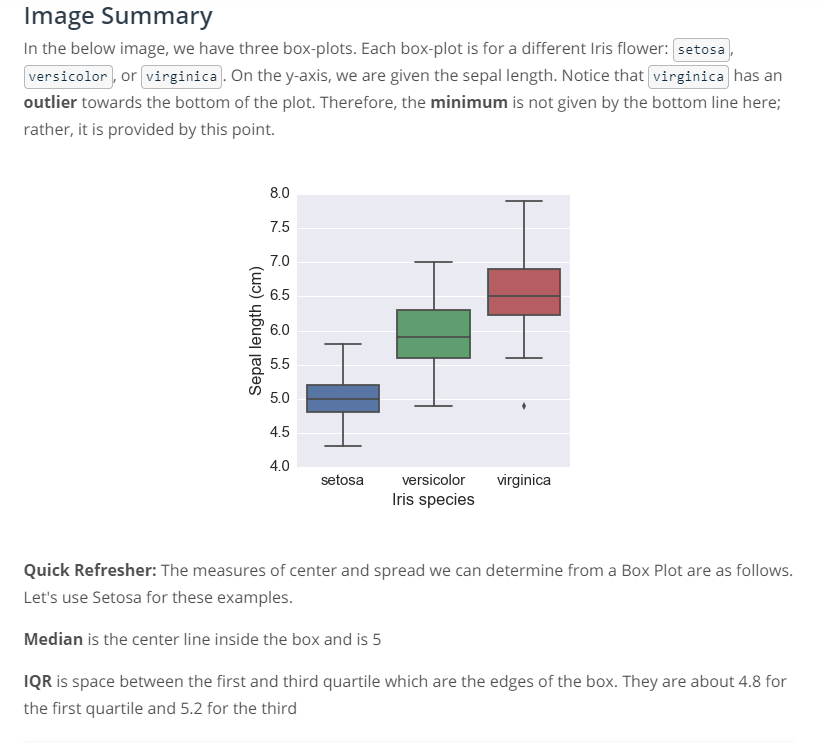

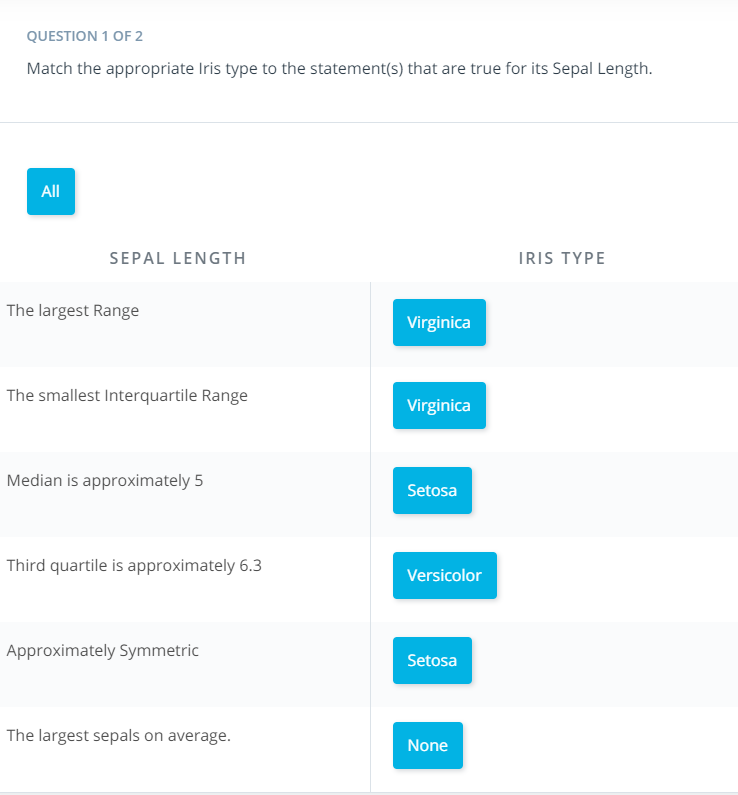

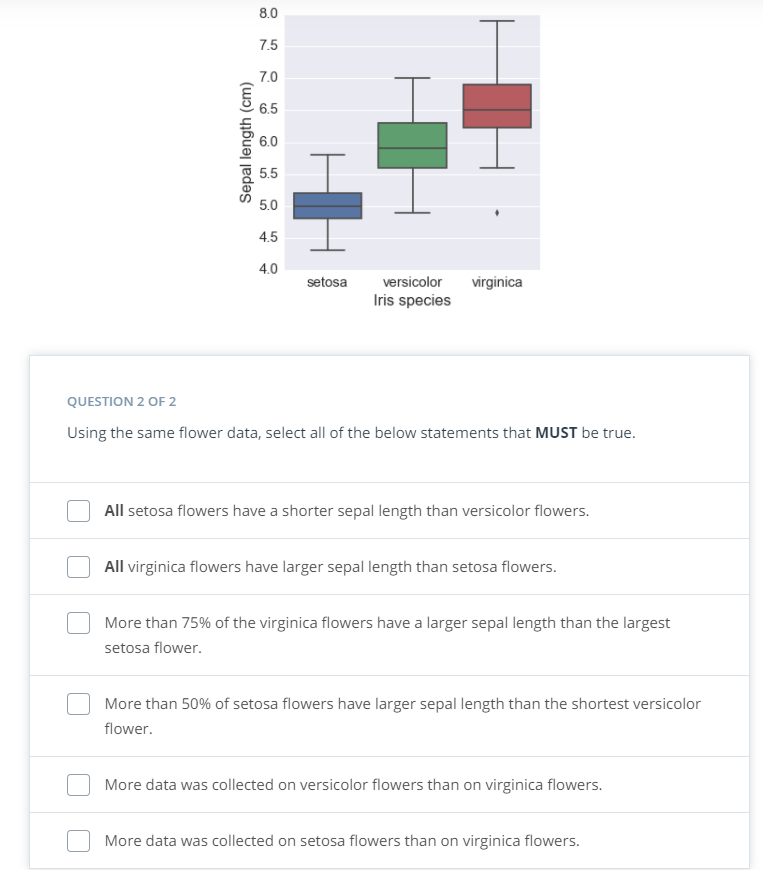

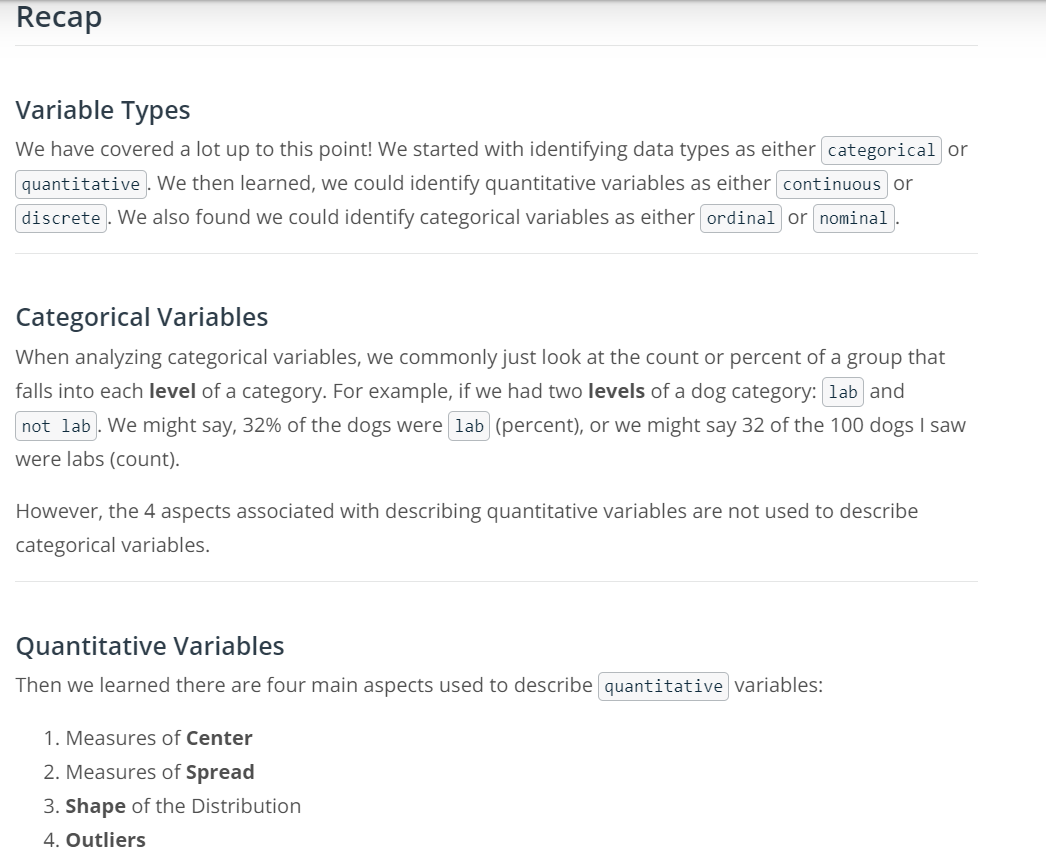

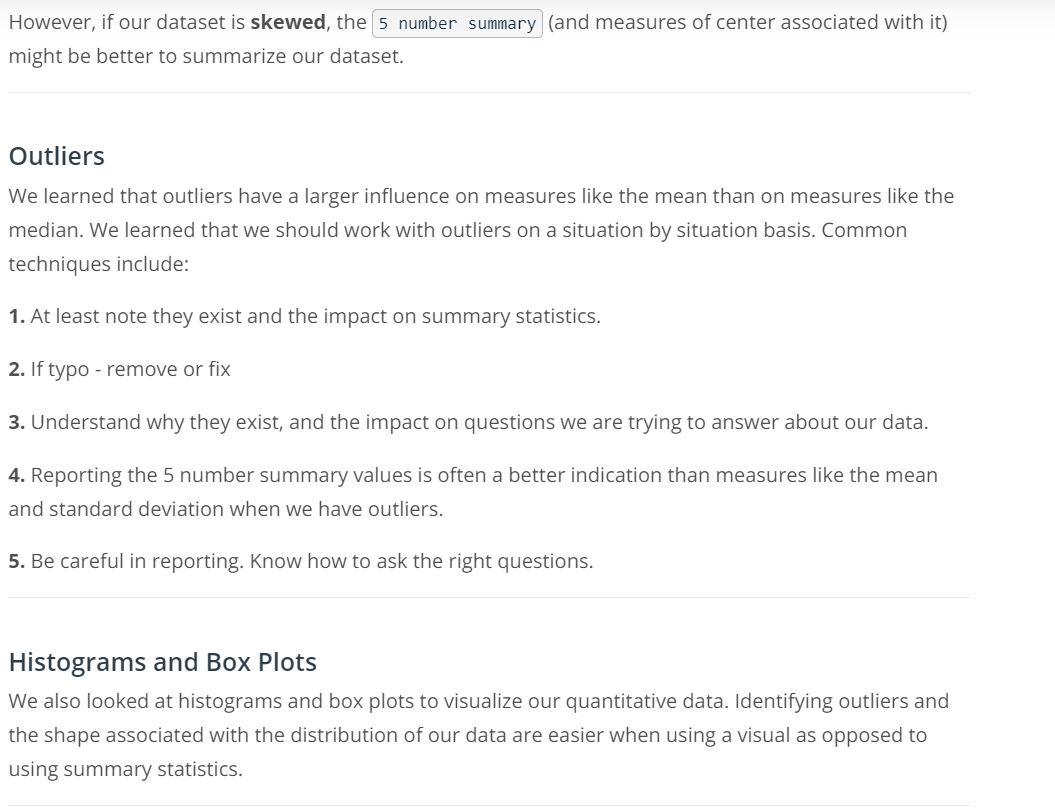

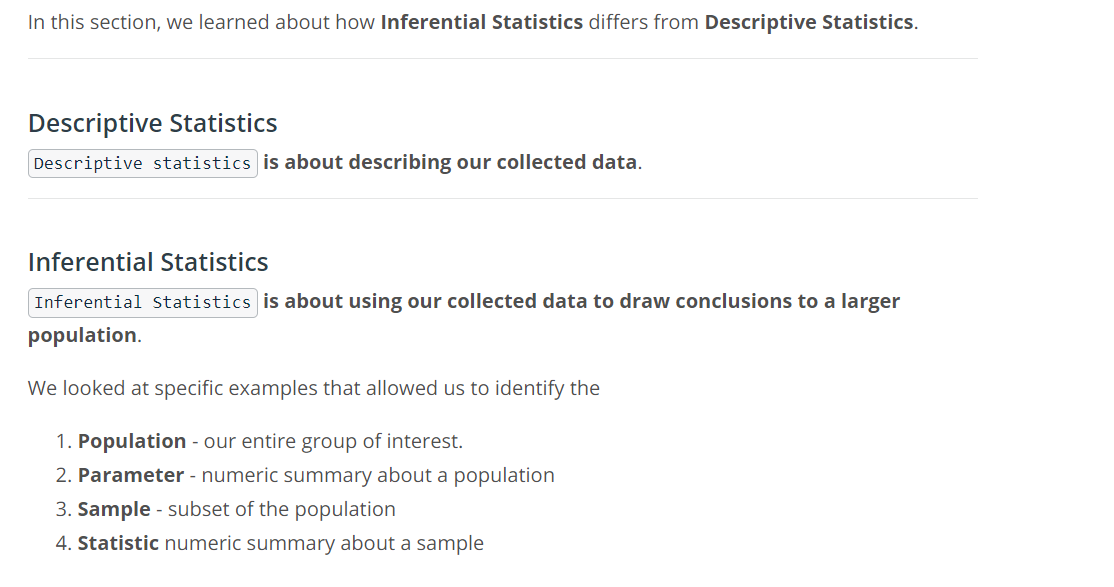

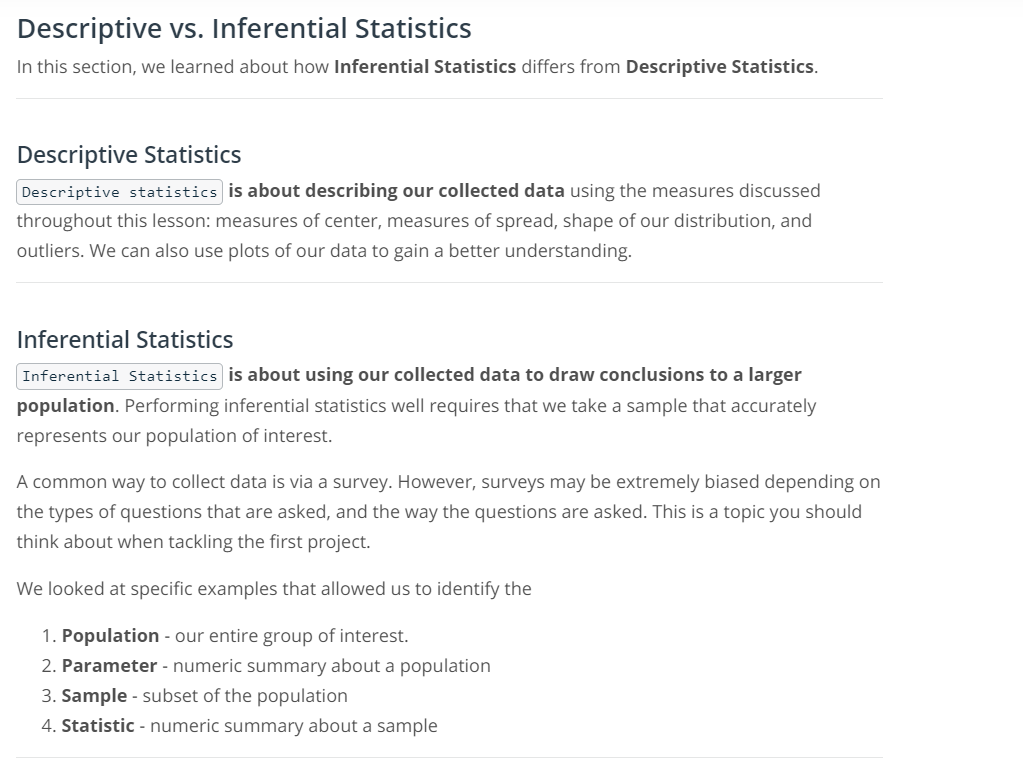

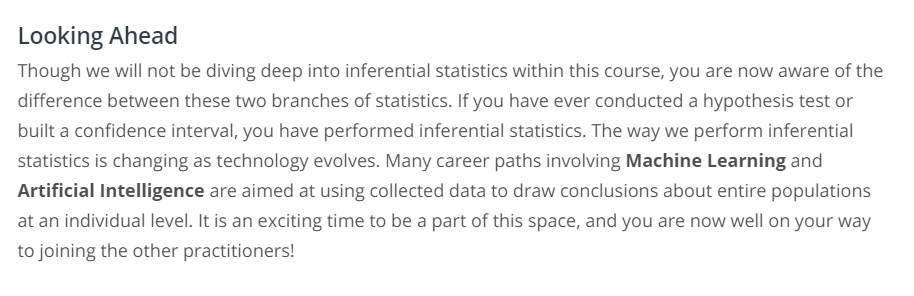

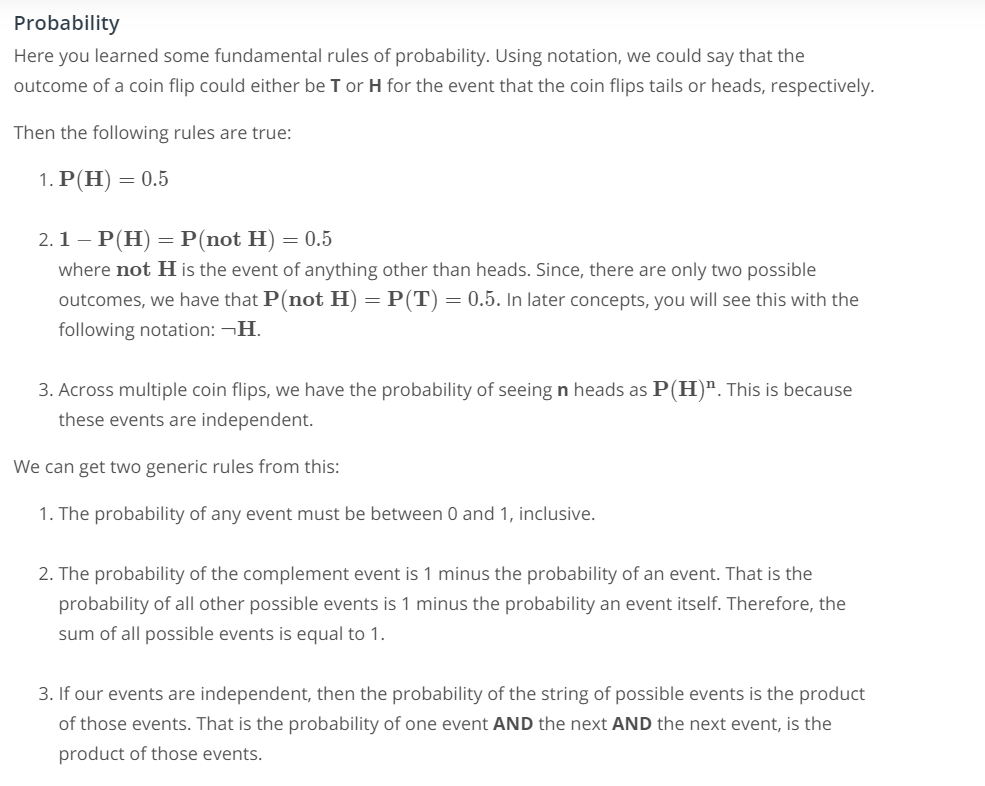

# Binomial Distribution